# A Perceptron in just a few Lines of Python Code

*Content created by [webstudio Richter](http://bestinnovations.de/wordpress/a-perceptron-in-just-a-few-lines-of-python-code/) on March 30. 2017.*

The perceptron can be used for supervised learning. It can solve binary linear classification problems. A comprehensive description of the functionality of a perceptron is out of scope here. To get in touch with the theoretical background, I advise the Wikipedia article:
    
[Wikipedia - Perceptron](https://en.wikipedia.org/wiki/Perceptron)

To better understand the internal processes of a perceptron, we will step by step develop a perceptron from scratch.

To follow this tutorial you already should know what a perceptron is and understand the basics of its functionality. Additionally a fundamental understanding of stochastic gradient descent is needed.

## Give Me the Code! 

In [278]:
import numpy as np

X = np.array([
    [-2,4,-1],
    [4,1,-1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],

])

y = np.array([-1,-1,1,1,1])

def perceptron_sgd(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 20

    for t in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w)*Y[i]) <= 0:
                w = w + eta*X[i]*Y[i]

    return w

print(perceptron_sgd(X,y))

[  2.   3.  13.]


## Our Ingredients 

First we will import numpy to easily manage linear algebraic and calculus operations in python. To plot the learning progress later on, we will use pylab.

In [279]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

### Stochastic Gradient Descent

We will implement the perceptron algorithm in python 3 and numpy. The perceptron will learn using the stochastic gradient descent algorithm (SGD). Gradient Descent minimizes a function by following the gradients of the cost function. For further details see:

[Wikipedia - stochastic gradient descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent)

### Calculating the Error 

To calculate the error of a prediction we first need to define the objective function of the perceptron. 

#### Hinge Loss Function

To do this, we need to define the loss function, to calculate the prediction error. We will use hinge loss for our perceptron:

$$c(x, y, f(x)) = (1 - y f(x))_+$$

$c$ is the loss function, $x$ the sample, $y$ is the true label, $f(x)$ the predicted label.

This means the following:
$$
c(x, y, f(x))= 
\begin{cases}
    0,& \text{if } y * f(x)\geq 1\\
    1-y*f(x),              & \text{else}
\end{cases}
$$

So consider, if y and f(x) are signed values $(+1,-1)$:

<ul>
    <li>the loss is 0, if $y*f(x)$ are positive, respective both values have the same sign.</li>
    <li>loss is $1-y*f(x)$ if $y*f(x)$ is negative</li>
</ul>

#### Objective Function 

As we defined the loss function, we can now define the objective function for the perceptron:

$$l_i(w) = \big(-y_i \langle x_i,w \rangle\big)_+$$

We can write this without the dot product with a sum sign:

$$l_i(w) = (-y_i \sum_{i=1}^n x_iw)_+$$

So the sample $x_i$ is misclassified, if $y_i \langle x_i,w \rangle \leq 0$. The general goal is, to find the global minima of this function, respective find a parameter $w$, where the error is zero.

#### Derive the Objective Function

To do this we need the gradients of the objective function. The gradient of a function f is the vector of its partial derivatives. The gradient can be calculated by the partially derivative of the objective function.

$$ \nabla l_i(w) = -y_i x_i $$


This means, if we have a misclassified sample $x_i$, respectively $ y_i \langle x_i,w \rangle \leq 0 $, update the weight vector
$w$ by moving it in the direction of the misclassified sample.


$$w = w + y_i x_i$$

With this update rule in mind, we can start writing our perceptron algorithm in python.

### Our Data Set 

First we need to define a labeled data set.

In [280]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we fold a bias term -1 into the data set. This is needed for the SGD to work. Details see [The Perceptron algorithm](https://www.google.de/url?sa=t&rct=j&q=&esrc=s&source=web&cd=3&ved=0ahUKEwiQvp-F_PjSAhVLWRoKHbyLCgEQFggrMAI&url=http%3A%2F%2Fu.cs.biu.ac.il%2F~jkeshet%2Fteaching%2Fiml2016%2Fiml2016_tirgul03.pdf&usg=AFQjCNFpAYxgitb3mOnpE4aQdu6iLgFc0g&bvm=bv.150729734,d.d2s)

In [281]:
X = np.array([
    [-2,4,-1],
    [4,1,-1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],

])


In [282]:
y = np.array([-1,-1,1,1,1])

This small toy data set contains two samples labeled with $-1$ and three samples labeled with $+1$. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable:

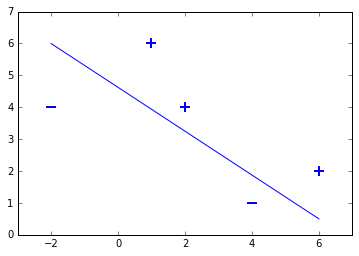

In [283]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2,6],[6,0.5])

## Lets Start implementing Stochastic Gradient Descent 

Finally we can code our SGD algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

In [284]:
def perceptron_sgd(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w)*Y[i]) <= 0:
                w = w + eta*X[i]*Y[i]
    return w

#### Code Description Line by Line

line <b>2</b>: Initialize the weight vector for the perceptron with zeros<br>
line <b>3</b>: Set the learning rate to 1<br>
line <b>4</b>: Set the number of epochs<br>
line <b>7</b>: Iterate over each sample in the data set<br>
line <b>8</b>: Misclassification condition $−y_i \langle x_i,w \rangle \leq 0$
line <b>9</b>: Update rule for the weights $w = w + y_i * x_i$ including the learning rate

### Let the Perceptron learn! 

Next we can execute our code and check, how many iterations are needed, until all sampels are classified right. To see the learning progress of the perceptron, we add a plotting feature to our algorithm, counting the total error in each epoch.

In [285]:
def perceptron_sgd_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.
    
    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w)*Y[i]) <= 0:
                total_error += (np.dot(X[i], w)*Y[i])
                w = w + eta*X[i]*Y[i]
        errors.append(total_error*-1)
        
    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    
    return w

[  2.   3.  13.]


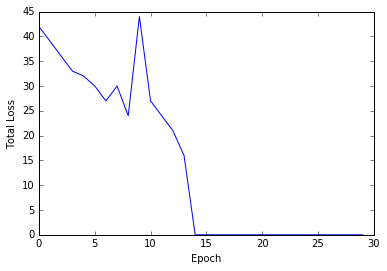

In [286]:
print(perceptron_sgd_plot(X,y))

This means, that the perceptron needed 14 epochs to classify all samples right (total error is zero). The weight vector is $(2,3,13)$.<br>
We can extract the following prediction function now:


$$
f(x) = \langle x,(2,3)\rangle - 13
$$

The weight vector is $(1,2)$ and the bias term is the third entry -4.

Lets classify the samples in our data set by hand now:

First sample $(-1, 2)$, supposed to be negative:

$$-1*1+2*2 - 4 = sign(-1) = -1$$

Second sample $(3, 0)$, supposed to be negative:

$$3*1+0*2 - 4 = sign(-1) = -1$$

Third sample $(0, 4)$, supposed to be positive:

$$0*1+4*2-4 = sign(4) = +1$$

Fourth sample $(1, 5)$, supposed to be positive:

$$1*1+5*2 - 4 = sign(7) = +1$$

Fifth sample $(2, 2)$, supposed to be positive:

$$2*1+2*2 - 4 = sign(1) = +1$$

### Final Thoughts 

Thats all about it. If you got so far, I hope you could learn something. Keep in mind, that the basic structure is the SGD and this is just four lines of code. It contains all the learning magic. Cool isnt it?

I am looking forward for your comments.

Greetings from Mavicc